In [1]:
import numpy as np
import pandas
import matplotlib
import seaborn as sns
import xlwt
from matplotlib import pyplot as plt
from xlwt import Workbook
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_text
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
from six import StringIO

In [2]:
def read_data_from_csv(file_name):
    return pandas.read_csv(file_name)
df = read_data_from_csv("final_data.csv")

In [3]:
df

,ID,field_of_study,Age,Sex,SAT_grade,Scouts_instructors,Army_field,Officer_carrier,_study,Business_during_study,SelfEsteem,Proactive,Creativity,Social
0,1,0,0,0,0,1,0,1,1,1,2,2,2,2
1,2,0,1,0,6,1,0,1,0,0,3,5,3,4
2,3,2,2,0,5,0,0,0,0,1,5,4,5,3
3,4,2,1,0,8,0,2,0,0,0,4,3,5,4
4,5,2,1,0,5,1,2,0,1,1,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,2,1,0,8,0,5,0,0,0,4,4,4,2
199,200,2,1,0,8,0,5,0,1,0,5,5,5,5
200,201,1,1,0,4,1,4,0,0,0,5,5,4,4
201,202,2,1,0,8,0,4,0,0,0,5,5,5,5


In [4]:
df["Army_field"].replace({2:1, 3:1, 4:1, 5:1}, inplace = True)

In [5]:
df.describe()

,ID,field_of_study,Age,Sex,SAT_grade,Scouts_instructors,Army_field,Officer_carrier,_study,Business_during_study,SelfEsteem,Proactive,Creativity,Social
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,102.000000,1.004926,1.334975,0.413793,6.152709,0.492611,0.684729,0.339901,0.157635,0.221675,4.211823,4.211823,4.270936,4.270936
std,58.745213,0.858836,0.618292,0.493730,1.832417,0.501181,0.465772,0.474846,0.365300,0.416400,0.801890,0.770404,0.838724,0.862010
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000
25%,51.500000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000
50%,102.000000,1.000000,1.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000
75%,152.500000,2.000000,2.000000,1.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000
max,203.000000,2.000000,3.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
cols = list(df.columns)
cols.remove('Army_field')
cols.remove('ID')
cols.remove('_study')

X = df[cols].copy()
y = df["Army_field"].copy()

In [7]:
X.dtypes

field_of_study           int64
Age                      int64
Sex                      int64
SAT_grade                int64
Scouts_instructors       int64
Officer_carrier          int64
Business_during_study    int64
SelfEsteem               int64
Proactive                int64
Creativity               int64
Social                   int64
dtype: object

In [8]:
#X_encoded = pd.get_dummies(X, columns = ['field_of_study','Age', 'SAT_grade'])
#X_encoded.head()

In [9]:
#check if we have zero or one
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

In [10]:
# Y is the unit field and X is the rest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 


In [11]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf = tree_clf.fit(X_train, y_train)

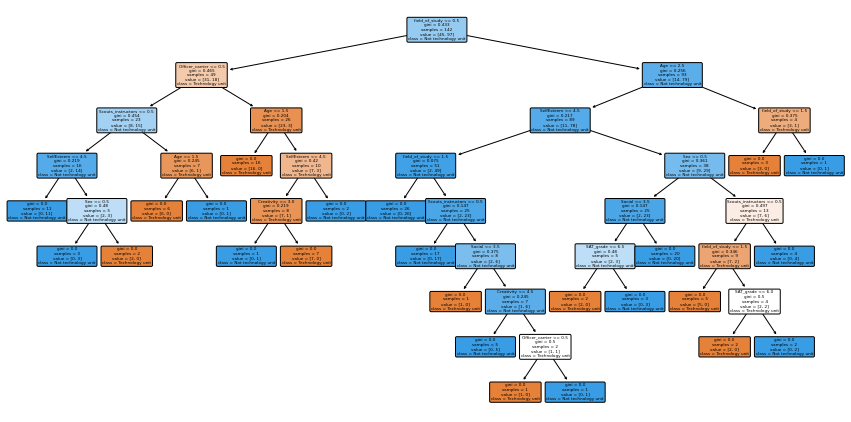

In [12]:
plt.figure(figsize=(15,7.5))
plot_tree(tree_clf,filled=True,rounded=True,class_names = ["Technology unit", "Not technology unit"], feature_names=X.columns);

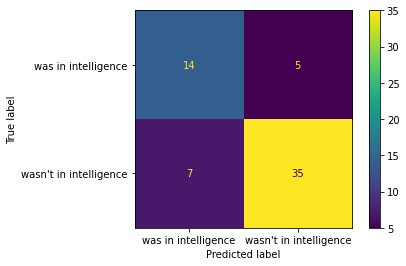

In [13]:
#Confusion matrix all the people who were in intelligence 
plot_confusion_matrix(tree_clf, X_test, y_test, display_labels = ["was in intelligence", "wasn't in intelligence"])

In [14]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

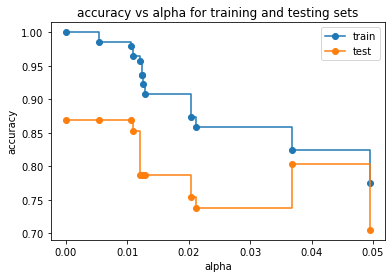

In [15]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

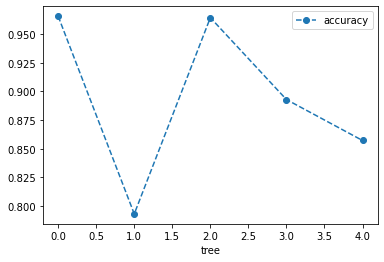

In [16]:
clf_dt = DecisionTreeClassifier(random_state=1,ccp_alpha = 0.01)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df1 = pd.DataFrame(data = {'tree':range(5), 'accuracy':scores})
df1.plot(x='tree',y='accuracy', marker = 'o', linestyle='--')

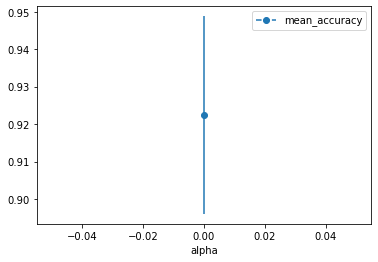

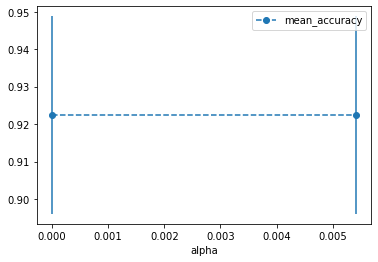

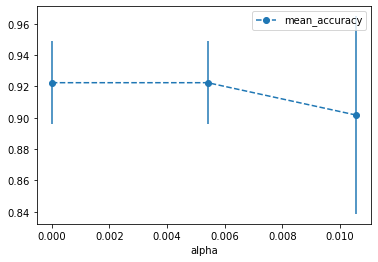

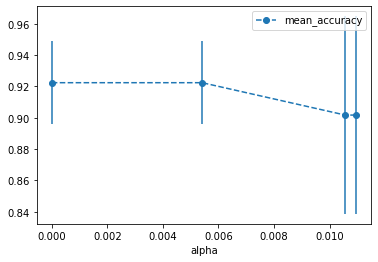

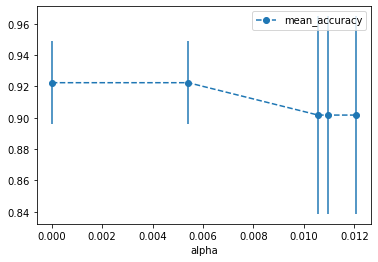

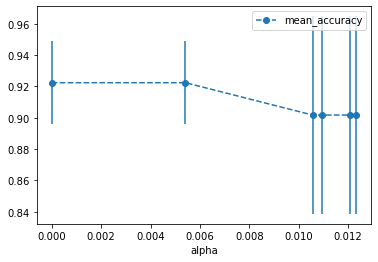

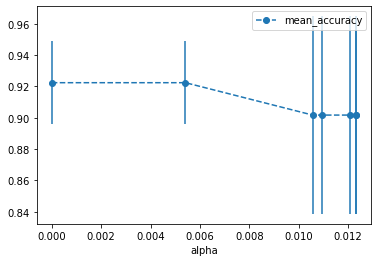

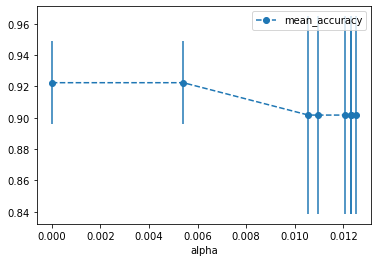

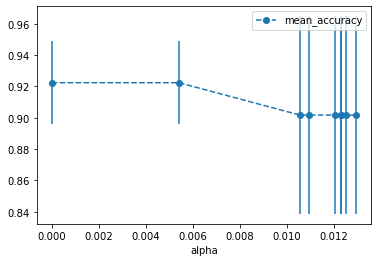

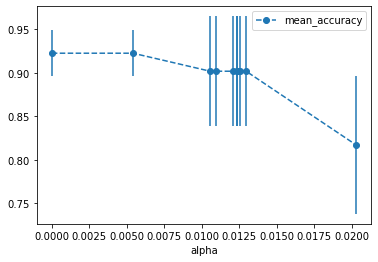

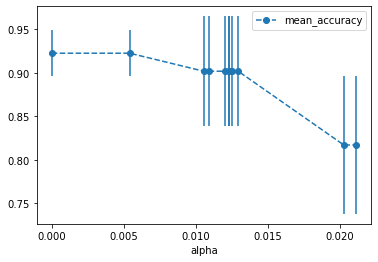

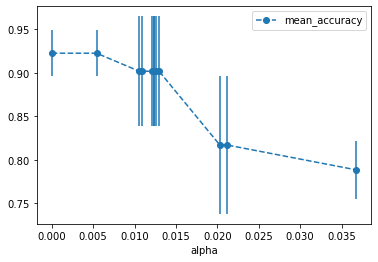

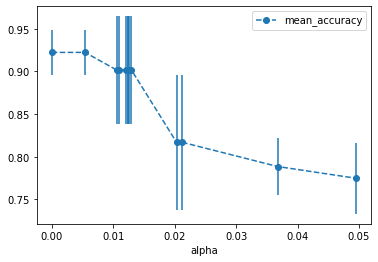

In [17]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
    alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])
    
    alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [18]:
alpha_results[(alpha_results['alpha'] > 0.03) & (alpha_results['alpha'] < 0.04)]

,alpha,mean_accuracy,std
11,0.036764,0.788424,0.033459


In [19]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.03) & (alpha_results['alpha'] < 0.04)]['alpha']
ideal_ccp_alpha

11    0.036764
Name: alpha, dtype: float64

In [20]:
clf_dt_pruned = DecisionTreeClassifier(random_state=1,ccp_alpha=0.037318)
clf_dt_pruned= clf_dt_pruned.fit(X_train,y_train)

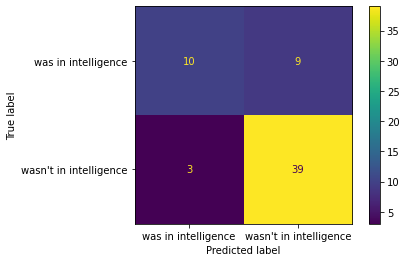

In [21]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test,display_labels=["was in intelligence", "wasn't in intelligence"])

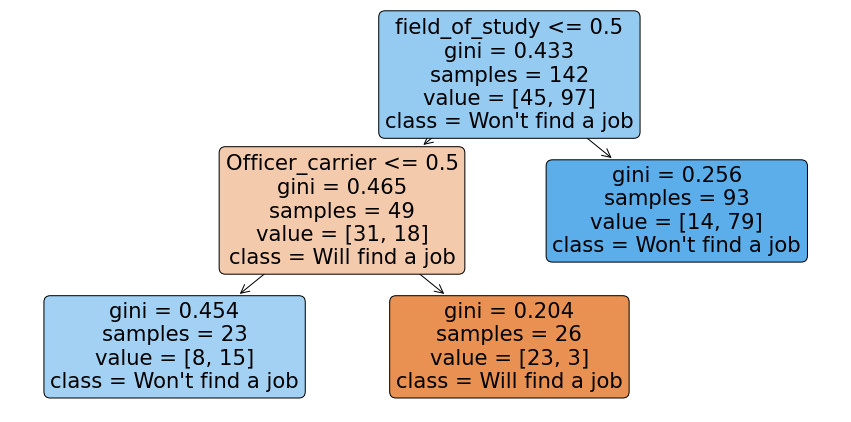

In [22]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["Will find a job", "Won't find a job"],feature_names=X.columns);

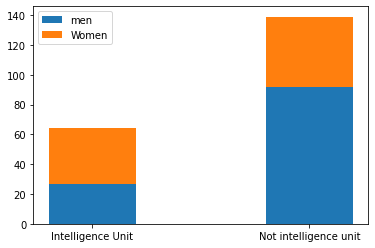

In [23]:
w=0.4
x = ["Intelligence Unit", "Not intelligence unit"]
men = [27,92]
women = [37,47]
plt.bar(x,men,w,label="men")
plt.bar(x,women,w,bottom=men,label='Women')
plt.legend()
plt.show()



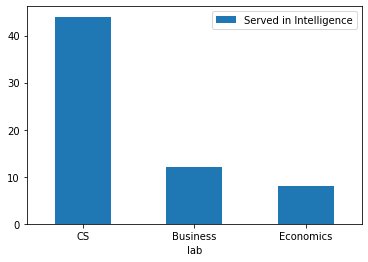

In [24]:
df = pd.DataFrame({'lab':['CS','Business','Economics'], 'Served in Intelligence':[44,12,8]})
ax = df.plot.bar(x='lab', y ='Served in Intelligence',rot=0)


In [25]:
conda install graphviz

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [26]:
conda install pydotplus

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [27]:
from io import StringIO
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn import tree
from IPython.display import Image
import pydotplus

In [28]:
dot_data = StringIO()
export_graphviz(tree_clf,
               out_file = dot_data,
               filled=True,
               rounded=True,
               special_characters=True,
               feature_names=list(X.columns),
               class_names=['Served in Intelligence','Didnt served in intelligence'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_pdf('Tree2.pdf')
graph.write_png('Tree2.png')

True

In [32]:
df = pd.DataFrame({'lab':['Was instructors in the scout','Wasnt an instructor in the scout'], 'Served in Intelligence':[74,29],'Didnt served in intelligence':[65,35]})
ax = df.plot.bar(x='lab', y ='Served in Intelligence','Didnt served in intelligence',rot=0)



SyntaxError: positional argument follows keyword argument (<ipython-input-32-a89a4614d9b3>, line 2)

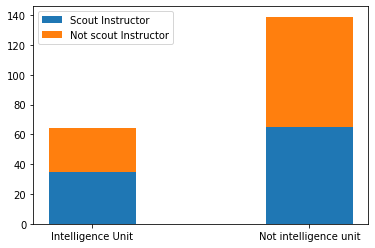

In [37]:
w=0.4
x = ["Intelligence Unit", "Not intelligence unit"]
scout_ins = [35,65]
not_ins = [29,74]
plt.bar(x,scout_ins,w,label="Scout Instructor")
plt.bar(x,not_ins,w,bottom=scout_ins,label='Not scout Instructor')
plt.legend()
plt.show()
